In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#import dataframe
dataset = pd.read_csv('tashdata.csv')

# basic info
dataset.info()
dataset.columns


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1914 entries, 0 to 1913
Data columns (total 22 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   y_analysisGender2Category      1914 non-null   object
 1   y_analysisGender3Category      1914 non-null   object
 2   analysisHasSecondaryMorphYN    414 non-null    object
 3   analysisMutability             1914 non-null   object
 4   m_analysisPluralPattern        1914 non-null   object
 5   m_analysisRAugVowel            1914 non-null   object
 6   analysisSemanticCoreYN         1914 non-null   object
 7   analysisSingularTheme          1863 non-null   object
 8   p_analysisThemeCV              1863 non-null   object
 9   p_analysisThemeFinalSegment    1863 non-null   object
 10  p_analysisThemeInitialSegment  1863 non-null   object
 11  s_lexiconAnimateYN             1914 non-null   object
 12  lexiconGlossEnglish            1914 non-null   object
 13  lex

Index(['y_analysisGender2Category', 'y_analysisGender3Category',
       'analysisHasSecondaryMorphYN', 'analysisMutability',
       'm_analysisPluralPattern', 'm_analysisRAugVowel',
       'analysisSemanticCoreYN', 'analysisSingularTheme', 'p_analysisThemeCV',
       'p_analysisThemeFinalSegment', 'p_analysisThemeInitialSegment',
       's_lexiconAnimateYN', 'lexiconGlossEnglish', 'lexiconGlossFrench',
       's_lexiconHumanYN', 'm_lexiconLoanwordSource', 's_lexiconSemanticField',
       's_lexiconSexGender', 'recordID', 'm_wordDerivedCategory',
       'wordLexBitVector', 'm_wordNumSemanticCategory'],
      dtype='object')

**Rundown of the data:**
*   Prefixes describe the type of variable: p_ = phonological, m_ = morphological, s_ = semantic, y_ is the dependent variable; unprefixed variables are possibly important
*   All predictor variables are categorical, so they will need to be converted to numerical values later

**Explanation of above gaps:**
*   analysisHasSecondaryMorphYN = Y if word has secondary morphology, otherwise null, so null could be N; this should overlap with m_wordNumSemanticCategory, but there seems to be one more non-null in this field
*   p_* items and ThemeCV have 1863 non-null values because 51 nouns have no singular, so we just don't have info about singular forms; the null here overlaps with No Plural value in m_analyisisPluralPattern
*   s_lexiconSexGender has many null values because inanimates dominate the data, and they are not specified for sex/gender





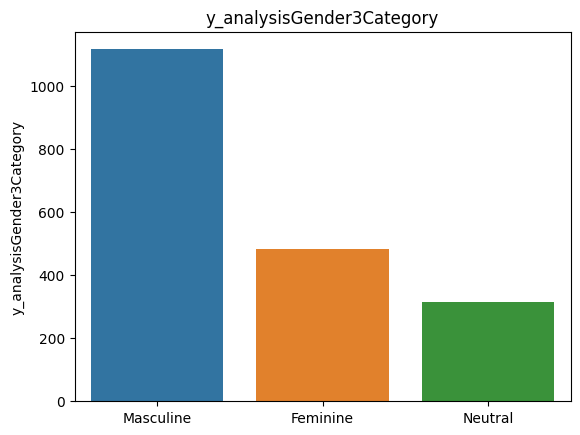

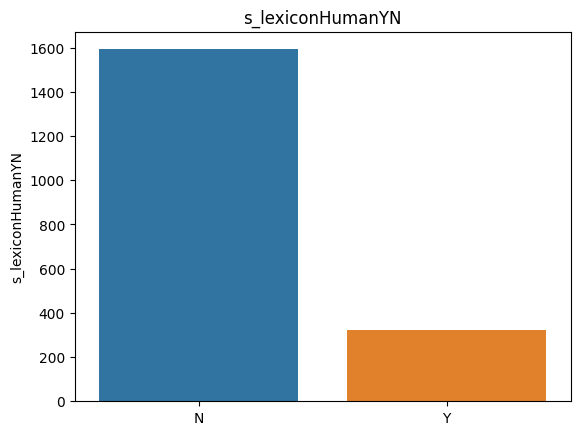

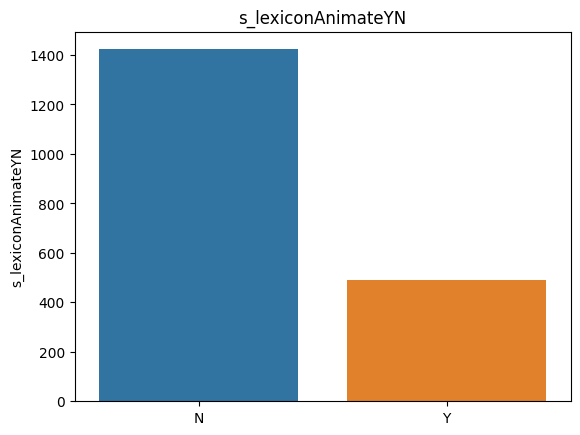

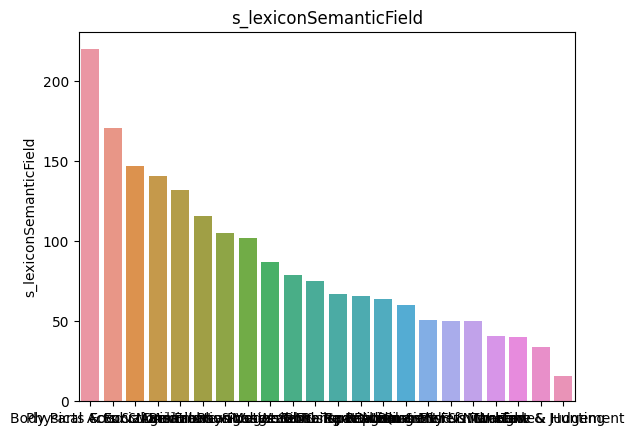

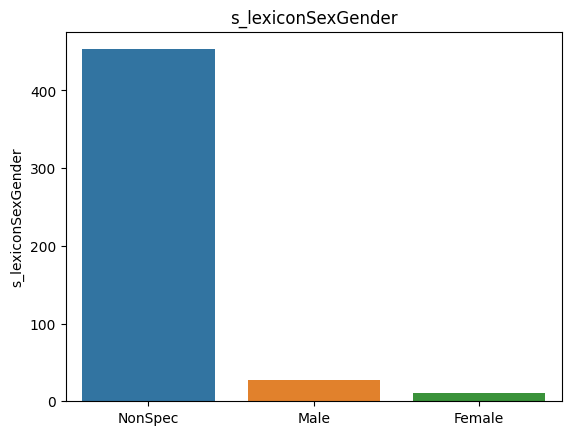

In [3]:
# bar plots for y and semantic predictors
y = 'y_analysisGender3Category'
human = 's_lexiconHumanYN'
animate = 's_lexiconAnimateYN'
field = 's_lexiconSemanticField'
sex = 's_lexiconSexGender'

df_sem = dataset[[y, human, animate, field, sex]]

for i in df_sem.columns:
	sns.barplot(x=df_sem[i].value_counts().index, y=df_sem[i].value_counts())
	plt.title(i)
	plt.show()


**Observations:**

*   Masc > Fem > Neut ~ 58% > 25% > 17%, so chance rates should follow these trends
*   Most nouns are non-human and inanimate
*   Distribution of semantic field counts is pretty broad
*   Almost animate nouns are not sex-differentiated





In [4]:
# Create crosstabs for all semantic variables and y

# Create a list of variables
sem_variables = [human, animate, field, sex]

# Create a dictionary to store the contingency tables
contingency_tables = {}

# Loop through the variables and create crosstabs
for var in sem_variables:
    contingency_tables[var] = pd.crosstab(dataset[var], dataset[y])

# Display the contingency tables
for var, table in contingency_tables.items():
    print(f"Contingency table for {var}:\n{table}\n")

Contingency table for s_lexiconHumanYN:
y_analysisGender3Category  Feminine  Masculine  Neutral
s_lexiconHumanYN                                       
N                               474       1019       99
Y                                 9         97      216

Contingency table for s_lexiconAnimateYN:
y_analysisGender3Category  Feminine  Masculine  Neutral
s_lexiconAnimateYN                                     
N                               459        953       11
Y                                24        163      304

Contingency table for s_lexiconSemanticField:
y_analysisGender3Category  Feminine  Masculine  Neutral
s_lexiconSemanticField                                 
Agriculture & Vegetation         21         76        8
Animals                          17         65       50
Body Parts & Functions           45        147       28
Clothing & Adornment             14         51        1
Dwellings & Furniture            20         31        0
Emotion                       

**Observations:**

*   Human and animate nouns are skewed towards Neutral, so likely predictive.
*   Semantic field seems to track the chance distributions, except in cases that require sex-differentiate, like Animals and Mankind; so semantic field is probably confounded with Humanness and Animacy.
*   But SexGender is predictive of gender when it is specified

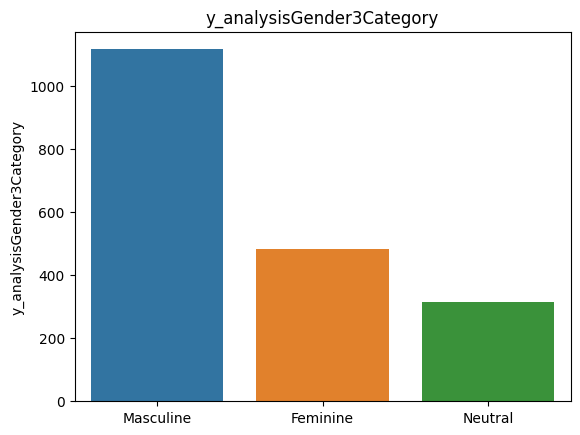

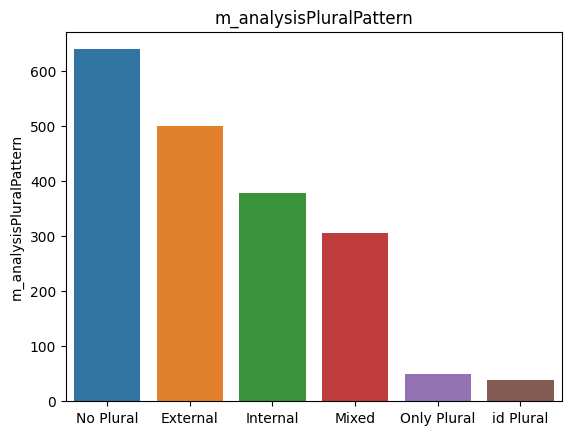

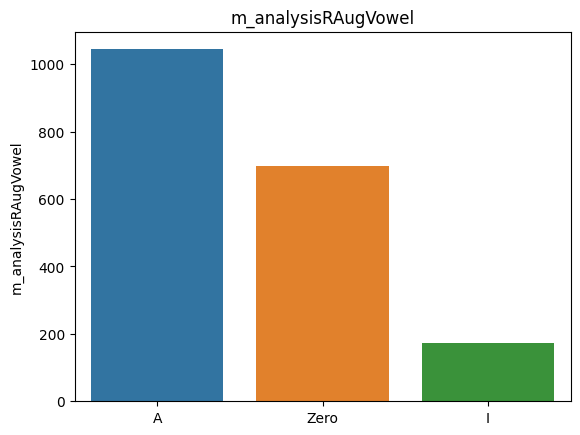

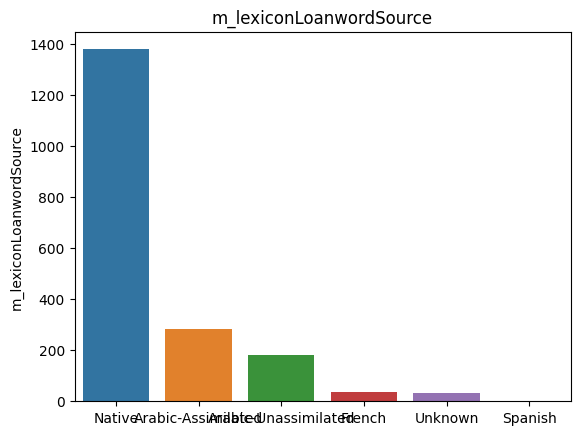

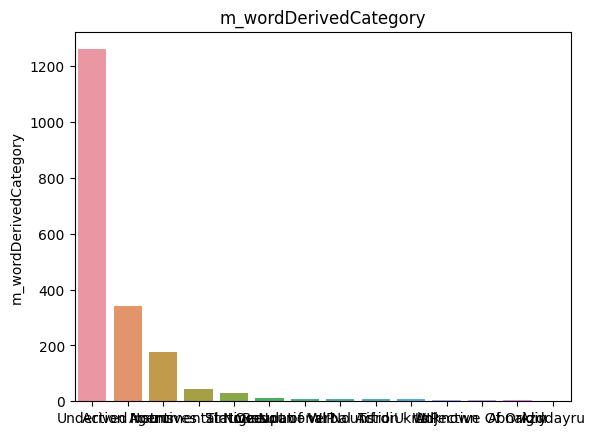

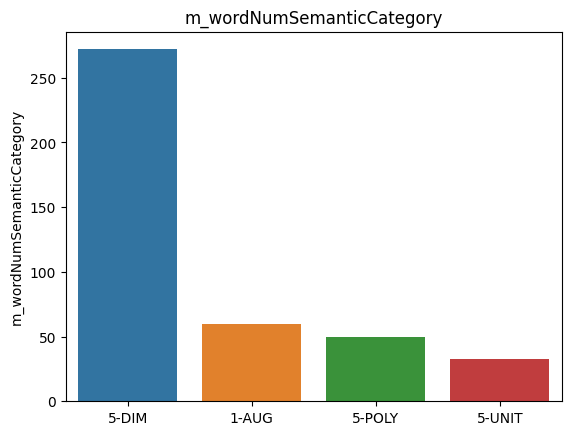

In [5]:
# barplots for morphological variables

y = 'y_analysisGender3Category'
plural = 'm_analysisPluralPattern'
rAug = 'm_analysisRAugVowel'
loan = 'm_lexiconLoanwordSource'
derived = 'm_wordDerivedCategory'
scat = 'm_wordNumSemanticCategory'

df_mor = dataset[[y, plural, rAug, loan, derived, scat]]

for i in df_mor.columns:
	sns.barplot(x=df_mor[i].value_counts().index, y=df_mor[i].value_counts())
	plt.title(i)
	plt.show()

In [6]:
# contingency tables for morphological variables

# Create a list of variables
mor_variables = [plural, rAug, loan, derived, scat]

# Create a dictionary to store the contingency tables
contingency_tables = {}

# Loop through the variables and create crosstabs
for mvar in mor_variables:
    contingency_tables[mvar] = pd.crosstab(dataset[mvar], dataset[y])

# Display the contingency tables
for mvar, table in contingency_tables.items():
    print(f"Contingency table for {mvar}:\n{table}\n")


Contingency table for m_analysisPluralPattern:
y_analysisGender3Category  Feminine  Masculine  Neutral
m_analysisPluralPattern                                
External                         66        275      160
Internal                         96        216       67
Mixed                            44        187       75
No Plural                       259        375        6
Only Plural                      17         33        0
id Plural                         1         30        7

Contingency table for m_analysisRAugVowel:
y_analysisGender3Category  Feminine  Masculine  Neutral
m_analysisRAugVowel                                    
A                               148        633      263
I                                73         82       17
Zero                            262        401       35

Contingency table for m_lexiconLoanwordSource:
y_analysisGender3Category  Feminine  Masculine  Neutral
m_lexiconLoanwordSource                                
Arabic-Assimilated   

**Observations:**
*   Many of the values of morphological variables are highly predictive (e.g., derived=Agentive, scat=5-DIM, scat=1-AUG)
*   Also, many variable variables are mildly predictive in that they subvert the normal chance rates, like PluralPattern=External, which have much higher than expected Neutral.
*   Conjecture: morphology seems much more predictive than semantics





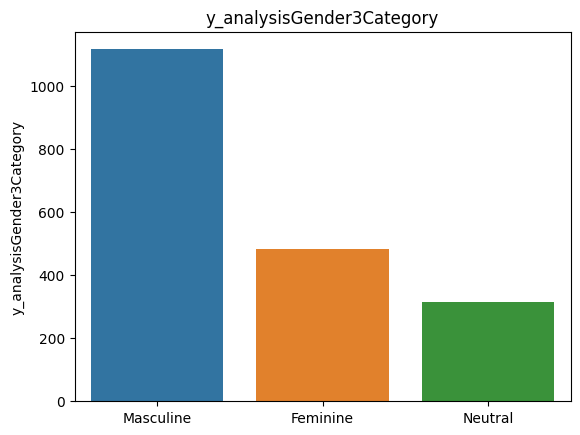

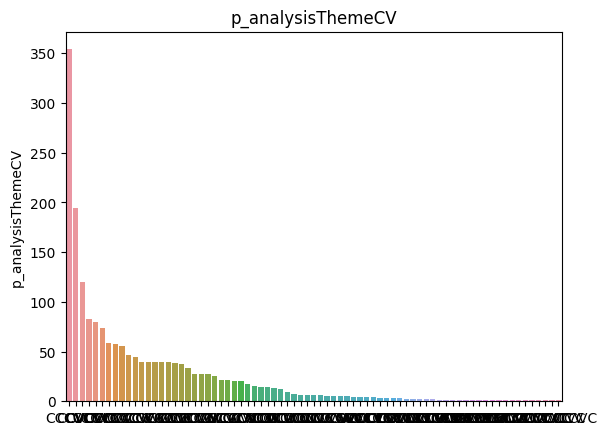

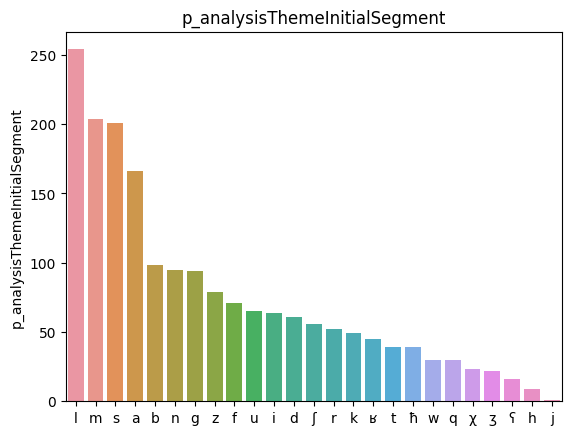

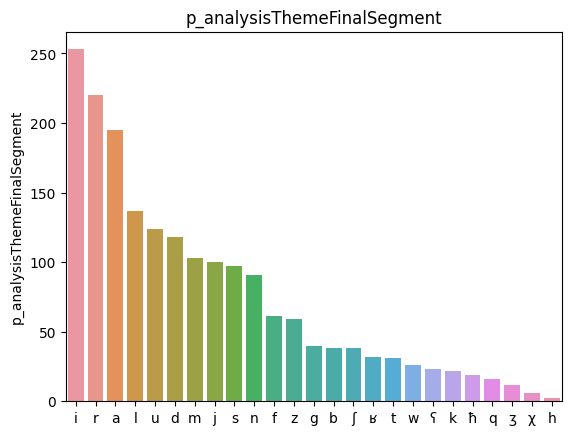

In [7]:
# barplots for phonological variables

y = 'y_analysisGender3Category'
themeCV = 'p_analysisThemeCV'
themeInitial = 'p_analysisThemeInitialSegment'
themeFinal = 'p_analysisThemeFinalSegment'

df_phon = dataset[[y, themeCV, themeInitial, themeFinal]]

for i in df_phon.columns:
	sns.barplot(x=df_phon[i].value_counts().index, y=df_phon[i].value_counts())
	plt.title(i)
	plt.show()

**Observations:**
*   Too many types for themeCV, so need feature engineering; somehow connect to number of syllables.
*   [l] is very common initial, clearly because of Arabic loans; also need feature engineering to capture [l]-initial themes and those that begin with geminates; these will be confounded with loanword source, because many [l]- and geminate-inital themes will be Arabic in origin.



In [8]:
# function for 'possible article' to check for confound with m_lexiconLoanwordSource
# context: many themes that start with [l] are Arabic in origin because they borrowed
# the word with the Arabic article 'al'. Also, many themes that begin with a coronal
# geminate, as in [ss] or [dd], could also have the article, because of the well-known
# process of /l + coronal/ --> geminate coronal, as in /l + s/ -> ss.
# so we need to check for a confound with these sequencies and loanwordSource

# Define a custom function to check the conditions
def check_theme_possible_article(word):
    # Convert to string and remove '!' if it's the first character
    word = str(word)
    if word.startswith('!'):
        word = word[1:]

    # Check the conditions and return 'Y' or 'N'
    if word.startswith('l'):
        return 'Y'
    elif len(word) >= 2 and word[0] in 'tdznsʃʒr' and word[0] == word[1]:
        return 'Y'
    else:
        return 'N'

# Apply the custom function to create the 'themePossibleArticle' column
dataset['themePossibleArticle'] = dataset['analysisSingularTheme'].apply(check_theme_possible_article)

# Export the DataFrame to an Excel file
#dataset.to_excel('output.xlsx', index=False)
#print("DataFrame exported to 'output.xlsx'")

In [9]:
# crosstab for possible article and loanword source
crosstab_article_loan = pd.crosstab(dataset['themePossibleArticle'], dataset['m_lexiconLoanwordSource'])
print(crosstab_article_loan)

m_lexiconLoanwordSource  Arabic-Assimilated  Arabic-Unassimilated  French  \
themePossibleArticle                                                        
N                                       161                    14      12   
Y                                       122                   167      26   

m_lexiconLoanwordSource  Native  Spanish  Unknown  
themePossibleArticle                               
N                          1296        0       11  
Y                            84        1       20  


**Observations:**
*   Words of Arabic origin have a strong tendency to have a possible article.
*   About 62% of all words of Arabic origin have this property (289/464), whereas only 9% of other words (including native words) do (131/1450)
*   Conclusion: 'themePossibleArticle' is confounded with loanword source, so need to attend to this.




